In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sklearn utils functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

In [2]:
class Perceptron:
    def __init__(self, inputDimension:int, learningRate:int = 0.01, epochThreshould:int = 10_000):
        self.weights = np.random.rand(inputDimension)
        self.bias = np.random.rand()
        self.learningRate = learningRate
        self.epochThreshould = epochThreshould

    def predict(self, xi):
        # soma ponderada
        predictValue = xi@self.weights + self.bias
        
        #função de ativação, signal
        predictValue = 1 if predictValue >= 0 else 0
        return predictValue
    
    def train(self, x, y):
        # x matriz (m, n). Linha representa uma amostra de dimensão n.
        # y array (m, 1). label de cada amostra.

        someError = True
        while(someError and self.epochThreshould >= 0):
            self.epochThreshould -= 1
            someError = False

            for i in range(len(y)):
                predictValue = self.predict(x[i,:])
                if(predictValue != y[i]):
                    someError = True
                    erro = y[i] - predictValue

                    for j in range(len(self.weights)):
                        self.weights[j] += self.learningRate*erro*x[i][j]

                    self.bias += self.learningRate*erro
        
    def trainWithoutConditional(self, x, y):
        # Função para testar a relevância da estrutura condicional no treino
        # x matriz (m, n). Linha representa uma amostra de dimensão n.
        # y array (m, 1). label de cada amostra.

        someError = True
        while(someError and self.epochThreshould >= 0):
            self.epochThreshould -= 1
            someError = False

            for i in range(len(y)):
                predictValue = self.predict(x[i,:])
                someError = someError or predictValue != y[i]
                erro = y[i] - predictValue

                for j in range(len(self.weights)):
                    self.weights[j] += self.learningRate*erro*x[i][j]

                self.bias += self.learningRate*erro

    def getWeights(self):
        return self.bias, self.weights
    



def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
    
        
                    


# Iris Dataset
Por limitações do Perceptron ( i.e. separabilidade lienar e classificação binária ) usaremos apenas Iris Setosa e Versicolor.

In [3]:
data = load_iris()
data.keys()

# Retirando Iris Virginica do Dataset
filter = data.target != 2

X = data.data[filter]
Y = data.target[filter]

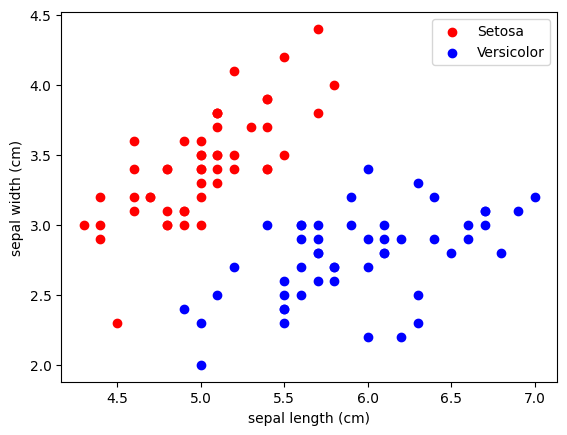

In [4]:
feature1 = 0
feature2 = 1
X = X[:, [feature1,feature2]]


filterSetosa = Y == 0
filterVersicolor = Y != 0
XSetosa = X[filterSetosa]
XVersicolor = X[filterVersicolor]

YSetosa = Y[filterSetosa]
YVersicolor = Y[filterVersicolor]


plt.scatter(XSetosa[:, 0], XSetosa[:, 1],label='Setosa',  c='red')
plt.scatter(XVersicolor[:,0], XVersicolor[:, 1], label='Versicolor', c='blue')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.legend()
plt.show()

## Train

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

inputDimension = X_train.shape[1]
neuron = Perceptron(inputDimension)
neuron.train(X_train, Y_train)

## Test

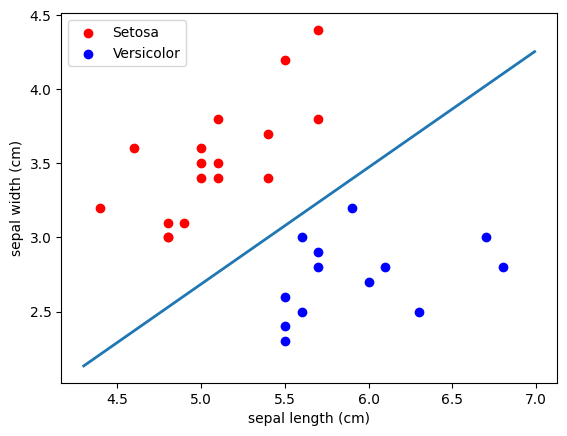

Accuracy: 1.0


In [6]:
# Ploting test
filterSetosa = Y_test == 0
filterVersicolor = Y_test == 1

XSetosaTest = X_test[filterSetosa]
XVersicolorTest = X_test[filterVersicolor]

YSetosa = Y_test[filterSetosa]
YVersicolor = Y_test[filterVersicolor]

plt.scatter(XSetosaTest[:, 0], XSetosaTest[:, 1],label='Setosa',  c='red')
plt.scatter(XVersicolorTest[:, 0], XVersicolorTest[:, 1], label='Versicolor', c='blue')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.legend()


bias, weights = neuron.getWeights()
x = np.arange(min(X[:, 0]), max(X[:,0]), 0.01)
fx = [(-weights[0]*p-bias)/weights[1] for p in x ]
plt.plot(x, fx, lw=2)

plt.show()

# Find metrics
Y_Predict = []
for x in X_test:
    Y_Predict.append(neuron.predict(x))

accuracy = accuracy_score(Y_test, Y_Predict)
print(f'Accuracy: {accuracy}')

# Cancer Dataset

In [7]:
data = load_breast_cancer()
data.data.shape

(569, 30)

## Training

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.30, random_state=42)

inputDimension = X_train.shape[1]
neuron = Perceptron(inputDimension)

In [9]:
neuron.train(X_train, Y_train)

## Testing

In [10]:
Y_Predict = []
for x in X_test:
    Y_Predict.append(neuron.predict(x))

accuracy = accuracy_score(Y_test, Y_Predict)
TP, FP, TN, FN = perf_measure(Y_test, Y_Predict)

print(f'Accuracy: {accuracy} False Negative: {FN/(TP+FP+TN+FN)}')

Accuracy: 0.9415204678362573 False Negative: 0.0


# Análise treino sem condicional
A ideia é verificar o quanto a condicional afeta em termos de desempenho no treino

## Iris

In [11]:
data = load_iris()

# Retirando Iris Virginica do Dataset
filter = data.target != 2

X = data.data[filter]
Y = data.target[filter]

feature1 = 0
feature2 = 1
X = X[:, [feature1,feature2]]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

inputDimension = X_train.shape[1]
neuron1 = Perceptron(inputDimension)
neuron2 = Perceptron(inputDimension)

In [13]:
print(f'Input Dimension: {inputDimension} Y_train Dimension: {Y_train.shape}')

Input Dimension: 2 Y_train Dimension: (70,)


In [14]:
neuron1.trainWithoutConditional(X_train, Y_train)

In [15]:
neuron2.train(X_train, Y_train)

## Cancer Dataset

In [16]:
data = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.30, random_state=42)

inputDimension = X_train.shape[1]
neuron1 = Perceptron(inputDimension)
neuron2 = Perceptron(inputDimension)

In [17]:
print(f'Input Dimension: {inputDimension} Y_train Dimension: {Y_train.shape}')

Input Dimension: 30 Y_train Dimension: (398,)


In [18]:
neuron1.trainWithoutConditional(X_train, Y_train)

In [19]:
neuron2.train(X_train, Y_train)